In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

#Predicting house value from a single feature
X_rooms = X[:,5]
#reshaping X numpy array
X_rooms = X_rooms.reshape(-1,1) #We have provided column as 1 but rows as unknown.

#reshaping y numpy array 
y = y.reshape(-1,1)

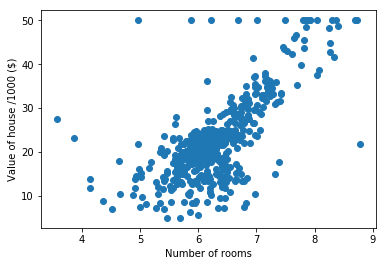

In [2]:
#Let's plot house value as a function of number of rooms using matplotlib's plt dot scatter
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_rooms,y)
plt.ylabel('Value of house /1000 ($)') #labeling the y label
plt.xlabel('Number of rooms') #labeling the x label
plt.show()
#more rooms lead to higher prices

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rooms,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression #Ordinary Least Squares
import numpy as np

regressor = LinearRegression()
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

0.4584649934303068

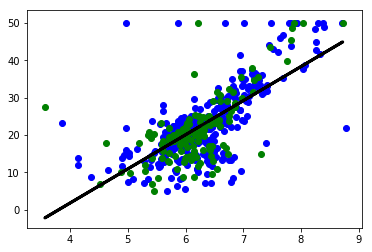

In [4]:
plt.scatter(X_train,y_train, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, gs.predict(X_test), color='black',linewidth=3)
plt.show()

In [5]:
# Estimated coefficients for the linear regression problem. 
print('Coefficients: ', gs.best_estimator_.coef_)

#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

Coefficients:  [[9.1181022]]
Intercept:  [-34.66230744]


In [6]:
import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,[9.118102197303786]
